In [87]:
import pandas as pd

In [88]:
df = pd.read_csv('./Frogs_MFCCs.csv')

In [89]:
df.drop('RecordID', axis=1, inplace=True)

In [90]:
y = df['Species']

In [91]:
X = df.drop(['Species', 'Family', 'Genus', 'MFCCs_ 1'], axis=1)
feature_names = X.columns

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from itertools import cycle

In [93]:
def plot_class_distribution(y):
  colors = "blue", "green", "cyan", "yellow", "orange", "red", "turquoise", "lime", "pink", "purple"
  cycol = cycle(colors)

  plt.figure(figsize=(10,5))
  freq, bins, patches = plt.hist(y, edgecolor='white', bins=y.unique().size)

  bin_centers = np.diff(bins)*0.5 + bins[:-1] 

  for fr, x in zip(freq, bin_centers):
      height = int(fr)
      plt.annotate("{}".format(height),
                 xy = (x, height),             
                 xytext = (0,0.2),             
                 textcoords = "offset points", 
                 ha = 'center', va = 'bottom'
                 )

  for patch in patches:
      patch.set_facecolor(next(cycol))

#create legend
  labels= y.unique()
  handles = [Rectangle((0,0),1,1,color=next(cycol),ec="k") for label in labels]
  plt.legend(handles, labels)

  plt.xticks([])

  plt.gca().spines["top"].set_visible(False)  
  plt.gca().spines["right"].set_visible(False)

  plt.show()

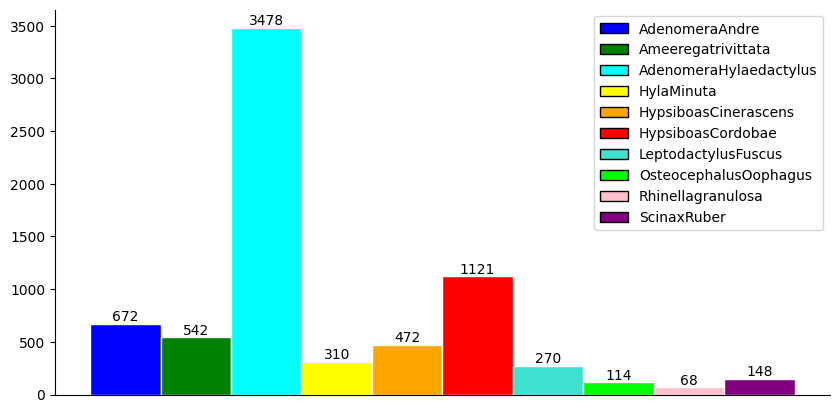

In [94]:
plot_class_distribution(y)

In [95]:
def IQR(df, feature_names):
  iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percentage'])

  for name in feature_names:
    (Q1, Q3) = X[name].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    iqr.loc[name, 'upper'] = upper
    iqr.loc[name, 'lower'] = lower

    num_upper = (X[name] > upper).sum()
    num_lower = (X[name] < lower).sum()
    percentage = round((num_upper + num_lower) / X.shape[0]*100)

    iqr.loc[name, 'num_upper'], iqr.loc[name, 'num_lower'], iqr.loc[name, 'percentage'] = num_upper, num_lower, percentage
    iqr.loc[name, 'max'], iqr.loc[name, 'min'] = max(X[name]), min(X[name])

  return iqr

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=41)

In [98]:
iqr = IQR(X_train, feature_names)
iqr

,lower,min,num_lower,upper,max,num_upper,percentage
MFCCs_ 2,-0.284987,-0.673025,40,0.917498,1.000000,95,2
MFCCs_ 3,-0.299929,-0.436028,19,0.869069,1.000000,306,5
MFCCs_ 4,0.002050,-0.472676,106,0.894548,1.000000,33,2
MFCCs_ 5,-0.204594,-0.636012,364,0.478903,0.752246,59,6
MFCCs_ 6,-0.232482,-0.410417,4,0.421020,0.964240,82,1
MFCCs_ 7,-0.442713,-0.538982,2,0.402555,1.000000,331,5
MFCCs_ 8,-0.270433,-0.576506,127,0.282432,0.551762,39,2
MFCCs_ 9,-0.386471,-0.587313,17,0.656514,0.738033,1,0
MFCCs_10,-0.179418,-0.952266,372,0.296011,0.522768,222,8
MFCCs_11,-0.714684,-0.901989,3,0.471513,0.523033,6,0


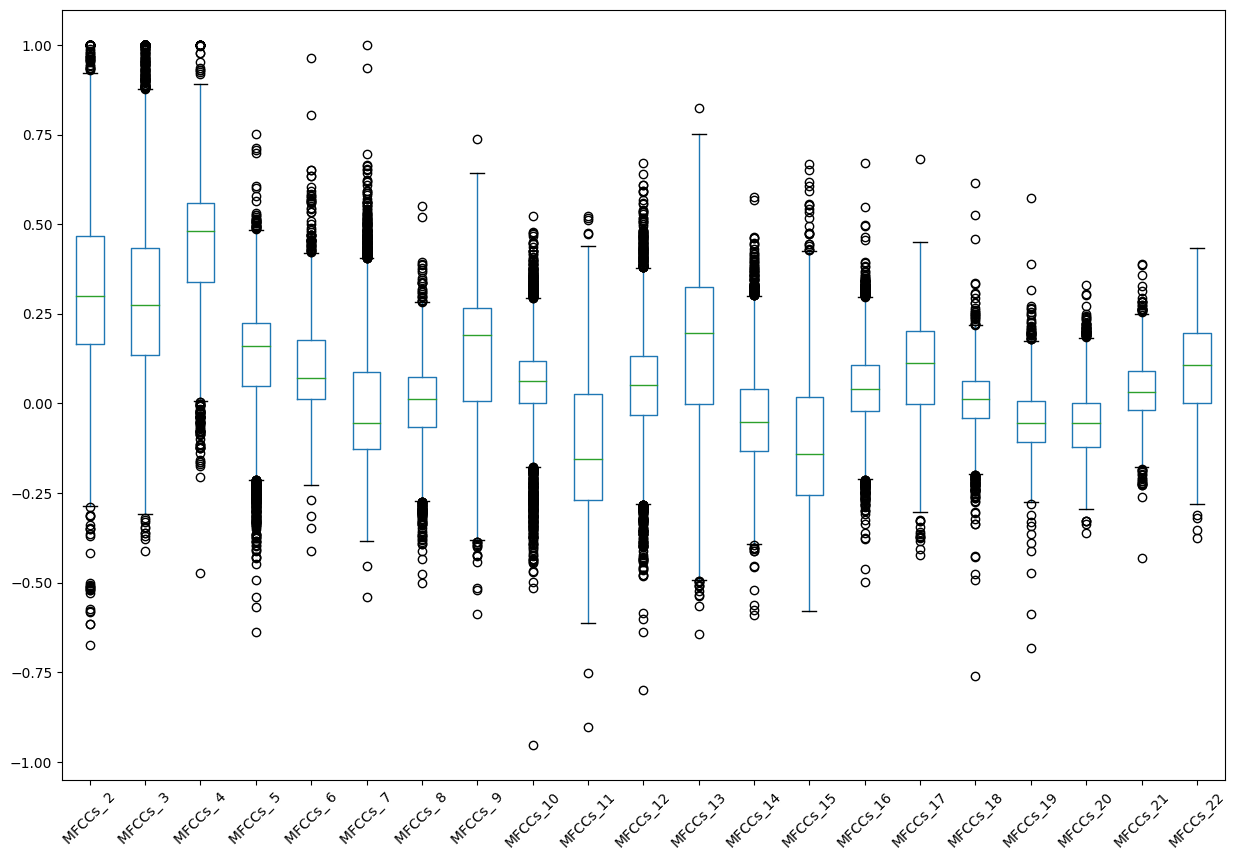

In [99]:
boxplot = X_train.boxplot(column=X_train.columns.to_list(), grid=False, rot=45, figsize=(15,10))

In [100]:
for attr_name in X_train:
  lower = iqr['lower'][attr_name]
  upper = iqr['upper'][attr_name]
  X_train.loc[X_train[attr_name] < lower] = np.nan    
  X_train.loc[X_train[attr_name] > upper] = np.nan  

In [101]:
drop_indexes = X_train[X_train.isna().any(axis=1)].index.values.tolist()

In [102]:
X_train.shape

(5036, 21)

In [103]:
len(drop_indexes)

1259

In [104]:
X_train.dropna(inplace=True)

In [105]:
y_train.drop(index=drop_indexes, inplace=True)

In [106]:
X_train.shape

(3777, 21)

In [107]:
y_train.shape

(3777,)

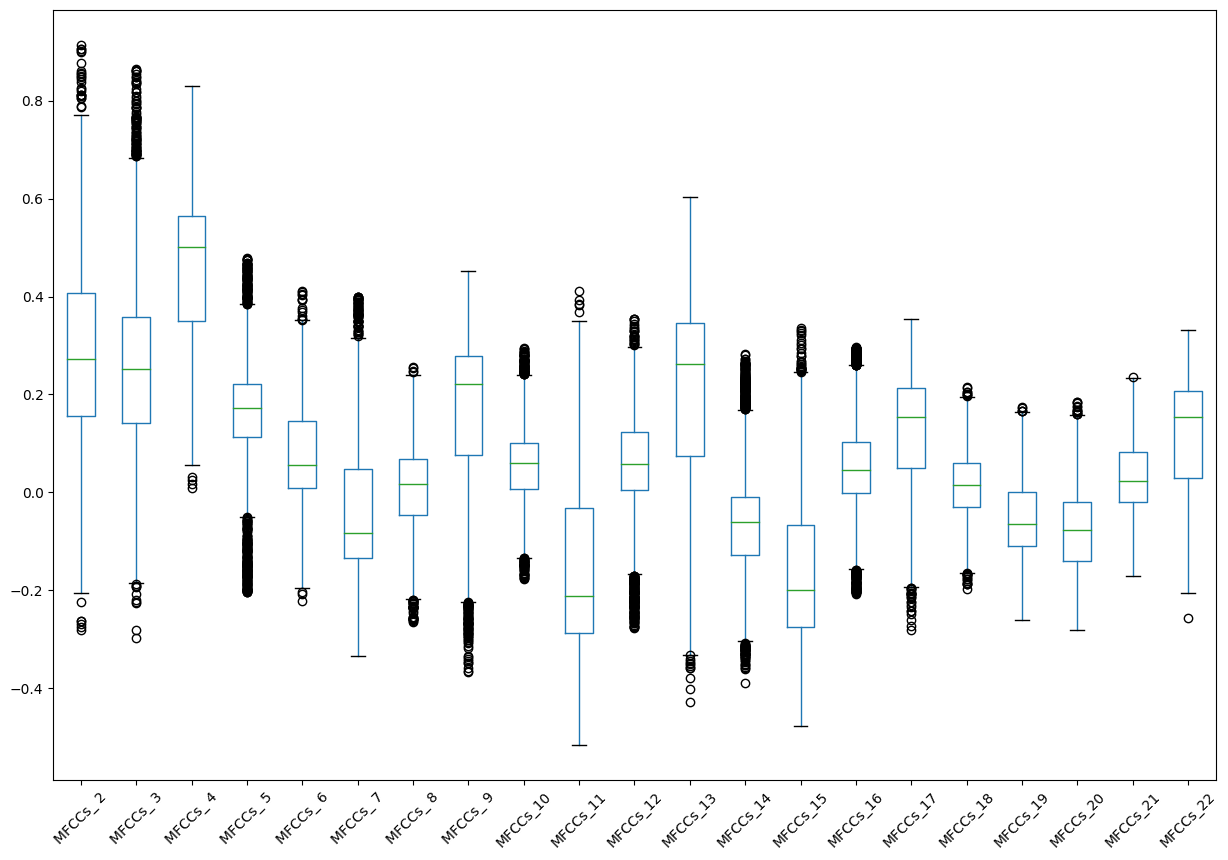

In [108]:
boxplot = X_train.boxplot(column=X_train.columns.to_list(), grid=False, rot=45, figsize=(15,10))

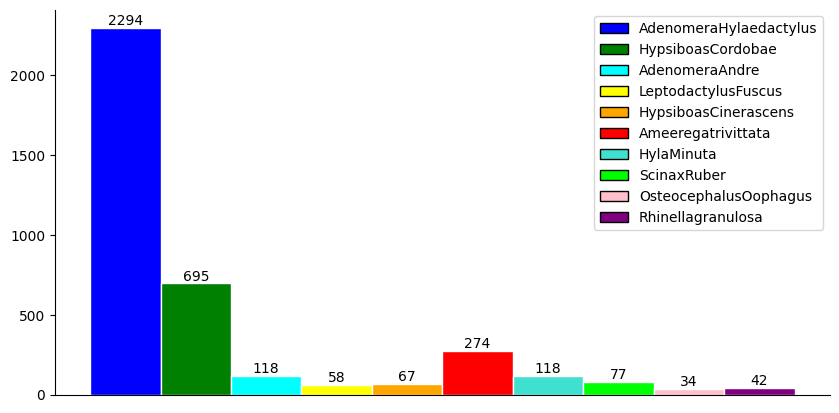

In [109]:
plot_class_distribution(y_train)

In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
smote = SMOTE(k_neighbors=10, random_state=42)

In [112]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

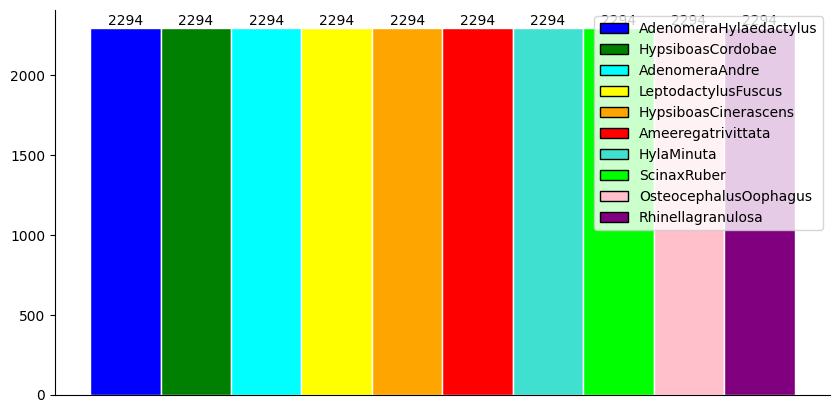

In [113]:
plot_class_distribution(y_train_resampled)

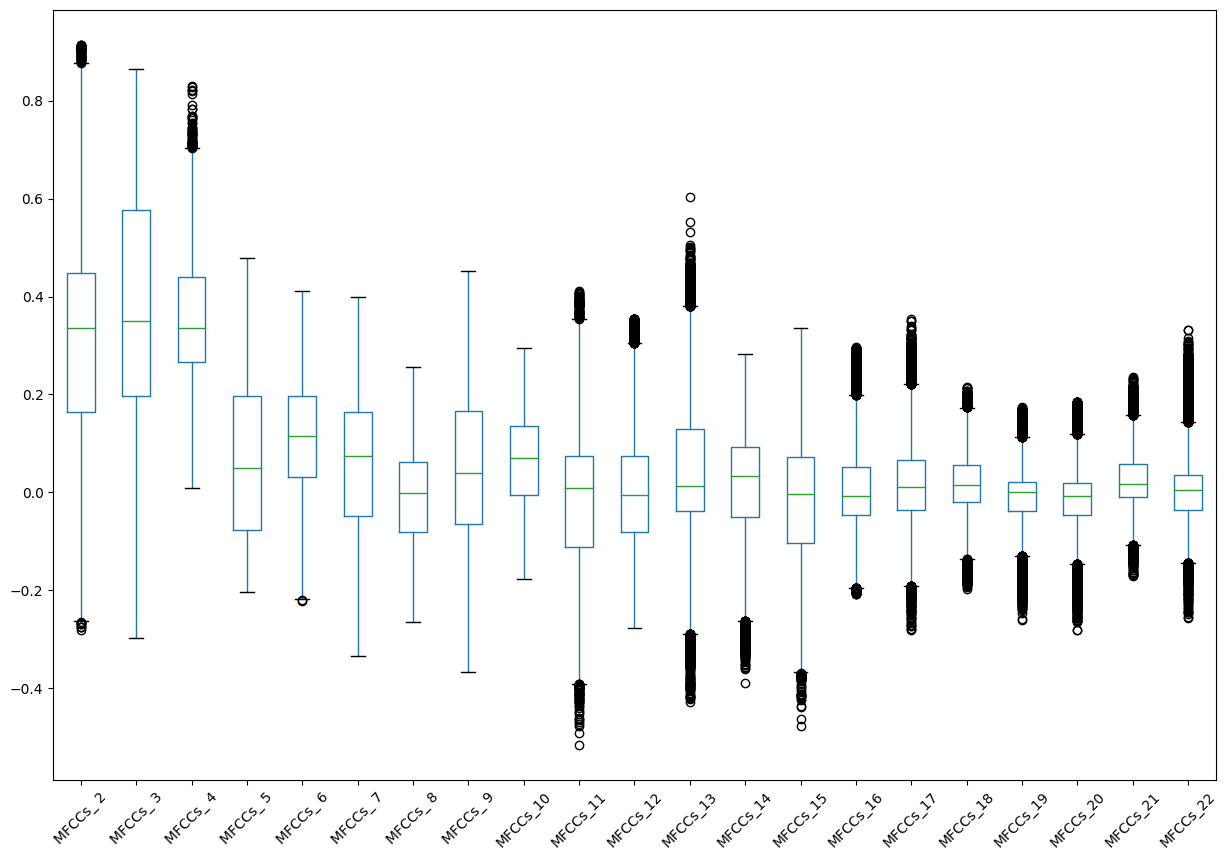

In [114]:
boxplot = X_train_resampled.boxplot(column=X_train_resampled.columns.to_list(), grid=False, rot=45, figsize=(15,10))

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=0.9)   

In [117]:
pca.fit(X_train_resampled)

PCA(n_components=0.9)

In [118]:
X_train_pca = pca.transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

In [119]:
pca_names = [f'pca_{i}' for i in range(len(X_train_pca[0]))]

In [120]:
X_train_pca = pd.DataFrame(X_train_pca, columns=pca_names)
X_train_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,0.586968,0.424424,0.081760,0.131547,0.041847,-0.005066,0.099684
1,0.126608,-0.081456,-0.131242,-0.044404,-0.155884,0.166836,-0.010023
2,0.262258,0.511376,-0.030616,0.092165,0.262008,0.024153,-0.044959
3,0.082409,-0.312672,0.170889,-0.142245,0.124855,0.041037,0.134700
4,-0.180472,0.398554,-0.324606,-0.418718,-0.067871,0.105683,0.128754
...,...,...,...,...,...,...,...
22935,-0.008000,0.374553,0.038218,0.333384,-0.336453,-0.245113,-0.041667
22936,0.034478,0.329229,0.065711,0.300808,-0.342751,-0.267955,-0.058398
22937,0.273859,0.100262,0.063421,0.256770,-0.380130,-0.150424,-0.096793
22938,0.321854,0.089615,0.034680,0.268490,-0.440581,-0.183705,-0.132880


In [121]:
X_test_pca = pd.DataFrame(X_test_pca, columns=pca_names)
X_test_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,0.360310,0.674810,-0.038641,0.077637,0.419505,-0.010536,0.022982
1,0.234338,0.508194,0.090894,0.090385,0.392706,-0.008876,0.023753
2,0.374255,0.499833,0.068664,0.042090,0.248615,0.126967,-0.041030
3,-0.004128,0.013947,0.051499,-0.101091,0.057051,0.102180,-0.025639
4,-0.099780,-0.426789,0.089003,0.102293,0.123121,-0.095689,0.020261
...,...,...,...,...,...,...,...
2154,-0.737236,-0.268555,-0.250000,0.456481,0.221026,0.031591,-0.167543
2155,0.495959,0.452124,0.026197,0.132304,0.489941,-0.136660,-0.136998
2156,0.491031,0.555590,0.044409,0.132258,0.254350,0.059660,-0.104570
2157,-0.465571,0.379233,0.750886,0.002354,-0.126523,0.071394,0.101828


Text(0.5, 1.0, 'Explained variance ratio')

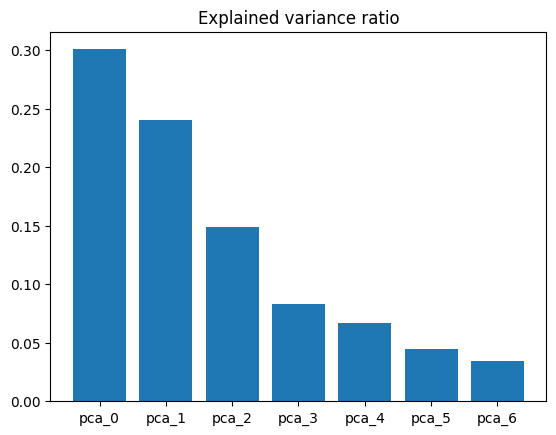

In [122]:
plt.bar(pca_names, pca.explained_variance_ratio_)
plt.title("Explained variance ratio")

In [123]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

Text(0.5, 1.0, 'Cumulative variance ratio')

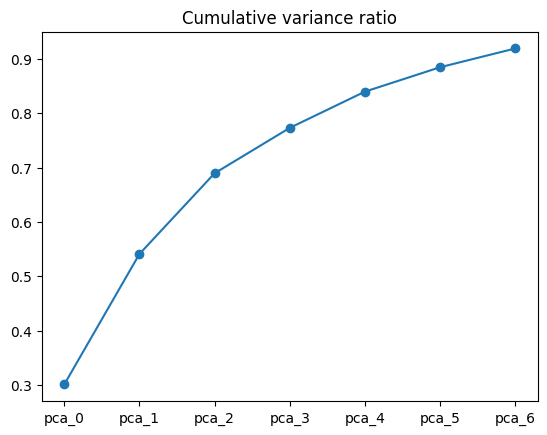

In [124]:
plt.plot(pca_names, cumulative_variance_ratio, marker='o')
plt.title('Cumulative variance ratio')

In [125]:
df_train = X_train_pca.join(y_train_resampled.reset_index(drop=True))
df_test = X_test_pca.join(y_test.reset_index(drop=True))

In [126]:
df_train

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,Species
0,0.586968,0.424424,0.081760,0.131547,0.041847,-0.005066,0.099684,AdenomeraHylaedactylus
1,0.126608,-0.081456,-0.131242,-0.044404,-0.155884,0.166836,-0.010023,HypsiboasCordobae
2,0.262258,0.511376,-0.030616,0.092165,0.262008,0.024153,-0.044959,AdenomeraHylaedactylus
3,0.082409,-0.312672,0.170889,-0.142245,0.124855,0.041037,0.134700,AdenomeraAndre
4,-0.180472,0.398554,-0.324606,-0.418718,-0.067871,0.105683,0.128754,LeptodactylusFuscus
...,...,...,...,...,...,...,...,...
22935,-0.008000,0.374553,0.038218,0.333384,-0.336453,-0.245113,-0.041667,ScinaxRuber
22936,0.034478,0.329229,0.065711,0.300808,-0.342751,-0.267955,-0.058398,ScinaxRuber
22937,0.273859,0.100262,0.063421,0.256770,-0.380130,-0.150424,-0.096793,ScinaxRuber
22938,0.321854,0.089615,0.034680,0.268490,-0.440581,-0.183705,-0.132880,ScinaxRuber


In [127]:
df_train.to_csv('./classification/classification_df_train.csv', index=False)

In [128]:
df_test.to_csv('./classification/classification_df_test.csv', index=False)